In [15]:
!pip install tensorflow==2.10.1 tensorflow-gpu==2.10.1 cvzone mediapipe sklearn matplotlib



In [16]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp


from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

from scipy import stats

mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities


def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results


def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.pose_landmarks, 
                              mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, 
                              mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, 
                              mp_holistic.HAND_CONNECTIONS) # Draw Right hand connections

    
def draw_styled_landmarks(image, results):
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 
    
    

In [18]:
cap = cv2.VideoCapture(1)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.75, min_tracking_confidence=0.75) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('Phien dich ngon ngu ki hieu', image)

        # Break gracefully
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [19]:
draw_landmarks(frame, results)

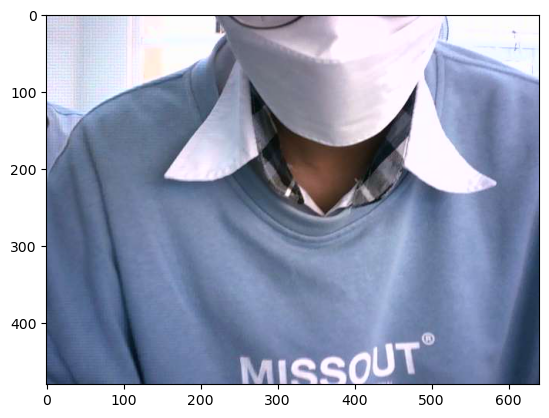

In [20]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# Trích xuất giá trị điểm chính




In [10]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, lh, rh])

In [11]:
result_test = extract_keypoints(results)

In [12]:
np.save('0', result_test)

In [13]:
np.load('0.npy')

array([ 5.03599763e-01,  5.33506334e-01, -1.14586949e+00,  9.99990106e-01,
        5.29756963e-01,  4.49177533e-01, -1.05632925e+00,  9.99986529e-01,
        5.48693597e-01,  4.51912999e-01, -1.05625582e+00,  9.99984980e-01,
        5.66384852e-01,  4.56131727e-01, -1.05600941e+00,  9.99984682e-01,
        4.69635874e-01,  4.47217733e-01, -1.07191050e+00,  9.99983609e-01,
        4.49226856e-01,  4.47953403e-01, -1.07120287e+00,  9.99979496e-01,
        4.29451078e-01,  4.50054169e-01, -1.07138884e+00,  9.99978065e-01,
        5.90621889e-01,  4.95152086e-01, -5.09712338e-01,  9.99987185e-01,
        3.97789419e-01,  4.87609327e-01, -5.70603490e-01,  9.99987781e-01,
        5.36105275e-01,  6.19297147e-01, -9.43164349e-01,  9.99988854e-01,
        4.63011652e-01,  6.17780447e-01, -9.62603271e-01,  9.99988735e-01,
        7.34106898e-01,  8.78530800e-01, -1.79090530e-01,  9.99570370e-01,
        2.61372447e-01,  8.41771841e-01, -2.34564304e-01,  9.97313678e-01,
        1.00376594e+00,  

# Thiết lập thư mục cho bộ siêu tập

In [14]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['A', 'C', 'Xin chào'])
labels_text = ['A', 'C', 'Xin chao']
len(labels_text)

# Thirty videos worth of data
no_sequences = 28

# Videos are going to be 30 frames in length
sequence_length = 28

In [15]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# Training dữ liệu

In [17]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()
                    
                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'Bat dau thu thap anh', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Thu thap " {} "  Anh so {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    
                    # Show to screen
                    cv2.imshow('Phien dich ngon ngu ki hieu', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Thu thap " {} "   Anh so {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('Phien dich ngon ngu ki hieu', image)
    
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(1) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [18]:
cap.release()
cv2.destroyAllWindows()

# Tiền xử lý dữ liệu, tạo nhãn và tính năng



In [19]:
label_map = {label:num for num, label in enumerate(actions)}

In [20]:
label_map

{'A': 0, 'C': 1, 'Xin chào': 2}

In [21]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [22]:
np.array(sequences).shape

(84, 28, 258)

In [23]:
np.array(labels).shape

(84,)

In [24]:
X = np.array(sequences)

In [25]:
X.shape

(84, 28, 258)

In [26]:
y = to_categorical(labels).astype(int)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [28]:
y_test.shape

(5, 3)

# LSTM Neural Network

In [29]:
log_dir = os.path.join('LSTM Neural Network')
tb_callback = TensorBoard(log_dir=log_dir)

In [41]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(28,258)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [31]:
res = [.7, 0.2, 0.1]

In [32]:
actions[np.argmax(res)]

'A'

In [42]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [34]:
model.fit(X_train, y_train, epochs=1000, callbacks=[tb_callback])

Epoch 1/1000
3/3 [==============================] - 10s 139ms/step - loss: 1.0934 - categorical_accuracy: 0.3671
Epoch 2/1000
3/3 [==============================] - 0s 136ms/step - loss: 1.0213 - categorical_accuracy: 0.4177
Epoch 3/1000
3/3 [==============================] - 0s 143ms/step - loss: 1.1105 - categorical_accuracy: 0.3544
Epoch 4/1000
3/3 [==============================] - 0s 136ms/step - loss: 1.0260 - categorical_accuracy: 0.5316
Epoch 5/1000
3/3 [==============================] - 0s 127ms/step - loss: 0.9304 - categorical_accuracy: 0.5570
Epoch 6/1000
3/3 [==============================] - 0s 129ms/step - loss: 1.0280 - categorical_accuracy: 0.3544
Epoch 7/1000
3/3 [==============================] - 0s 142ms/step - loss: 0.9714 - categorical_accuracy: 0.4937
Epoch 8/1000
3/3 [==============================] - 0s 135ms/step - loss: 0.8035 - categorical_accuracy: 0.5316
Epoch 9/1000
3/3 [==============================] - 0s 131ms/step - loss: 0.9256 - categorical_accuracy

3/3 [==============================] - 0s 134ms/step - loss: 0.0230 - categorical_accuracy: 1.0000
Epoch 74/1000
3/3 [==============================] - 0s 134ms/step - loss: 0.0342 - categorical_accuracy: 0.9873
Epoch 75/1000
3/3 [==============================] - 0s 119ms/step - loss: 0.0364 - categorical_accuracy: 0.9747
Epoch 76/1000
3/3 [==============================] - 0s 126ms/step - loss: 0.0054 - categorical_accuracy: 1.0000
Epoch 77/1000
3/3 [==============================] - 0s 121ms/step - loss: 0.1241 - categorical_accuracy: 0.9620
Epoch 78/1000
3/3 [==============================] - 0s 135ms/step - loss: 0.2116 - categorical_accuracy: 0.9241
Epoch 79/1000
3/3 [==============================] - 0s 126ms/step - loss: 0.9354 - categorical_accuracy: 0.7848
Epoch 80/1000
3/3 [==============================] - 0s 126ms/step - loss: 0.5357 - categorical_accuracy: 0.7722
Epoch 81/1000
3/3 [==============================] - 0s 126ms/step - loss: 0.3646 - categorical_accuracy: 0.94

3/3 [==============================] - 0s 111ms/step - loss: 1.3330e-04 - categorical_accuracy: 1.0000
Epoch 145/1000
3/3 [==============================] - 0s 119ms/step - loss: 1.2616e-04 - categorical_accuracy: 1.0000
Epoch 146/1000
3/3 [==============================] - 0s 110ms/step - loss: 1.2086e-04 - categorical_accuracy: 1.0000
Epoch 147/1000
3/3 [==============================] - 0s 119ms/step - loss: 1.1634e-04 - categorical_accuracy: 1.0000
Epoch 148/1000
3/3 [==============================] - 0s 110ms/step - loss: 1.1191e-04 - categorical_accuracy: 1.0000
Epoch 149/1000
3/3 [==============================] - 0s 119ms/step - loss: 1.0578e-04 - categorical_accuracy: 1.0000
Epoch 150/1000
3/3 [==============================] - 0s 126ms/step - loss: 1.0143e-04 - categorical_accuracy: 1.0000
Epoch 151/1000
3/3 [==============================] - 0s 113ms/step - loss: 9.8737e-05 - categorical_accuracy: 1.0000
Epoch 152/1000
3/3 [==============================] - 0s 110ms/step - l

3/3 [==============================] - 0s 134ms/step - loss: 5.2405e-06 - categorical_accuracy: 1.0000
Epoch 214/1000
3/3 [==============================] - 0s 147ms/step - loss: 5.1621e-06 - categorical_accuracy: 1.0000
Epoch 215/1000
3/3 [==============================] - 0s 155ms/step - loss: 5.0172e-06 - categorical_accuracy: 1.0000
Epoch 216/1000
3/3 [==============================] - 0s 154ms/step - loss: 4.9176e-06 - categorical_accuracy: 1.0000
Epoch 217/1000
3/3 [==============================] - 1s 178ms/step - loss: 4.8014e-06 - categorical_accuracy: 1.0000
Epoch 218/1000
3/3 [==============================] - 0s 132ms/step - loss: 4.7019e-06 - categorical_accuracy: 1.0000
Epoch 219/1000
3/3 [==============================] - 0s 149ms/step - loss: 4.6053e-06 - categorical_accuracy: 1.0000
Epoch 220/1000
3/3 [==============================] - 0s 152ms/step - loss: 4.5359e-06 - categorical_accuracy: 1.0000
Epoch 221/1000
3/3 [==============================] - 0s 171ms/step - l

3/3 [==============================] - 0s 91ms/step - loss: 1.3309e-06 - categorical_accuracy: 1.0000
Epoch 283/1000
3/3 [==============================] - 0s 80ms/step - loss: 1.3007e-06 - categorical_accuracy: 1.0000
Epoch 284/1000
3/3 [==============================] - 0s 86ms/step - loss: 1.2690e-06 - categorical_accuracy: 1.0000
Epoch 285/1000
3/3 [==============================] - 0s 89ms/step - loss: 1.2464e-06 - categorical_accuracy: 1.0000
Epoch 286/1000
3/3 [==============================] - 0s 93ms/step - loss: 1.2208e-06 - categorical_accuracy: 1.0000
Epoch 287/1000
3/3 [==============================] - 0s 82ms/step - loss: 1.1996e-06 - categorical_accuracy: 1.0000
Epoch 288/1000
3/3 [==============================] - 0s 78ms/step - loss: 1.1845e-06 - categorical_accuracy: 1.0000
Epoch 289/1000
3/3 [==============================] - 0s 81ms/step - loss: 1.1619e-06 - categorical_accuracy: 1.0000
Epoch 290/1000
3/3 [==============================] - 0s 85ms/step - loss: 1.14

3/3 [==============================] - 0s 71ms/step - loss: 5.7039e-07 - categorical_accuracy: 1.0000
Epoch 353/1000
3/3 [==============================] - 0s 79ms/step - loss: 5.6737e-07 - categorical_accuracy: 1.0000
Epoch 354/1000
3/3 [==============================] - 0s 95ms/step - loss: 5.6134e-07 - categorical_accuracy: 1.0000
Epoch 355/1000
3/3 [==============================] - 0s 71ms/step - loss: 5.5681e-07 - categorical_accuracy: 1.0000
Epoch 356/1000
3/3 [==============================] - 0s 86ms/step - loss: 5.5228e-07 - categorical_accuracy: 1.0000
Epoch 357/1000
3/3 [==============================] - 0s 63ms/step - loss: 5.4625e-07 - categorical_accuracy: 1.0000
Epoch 358/1000
3/3 [==============================] - 0s 55ms/step - loss: 5.3870e-07 - categorical_accuracy: 1.0000
Epoch 359/1000
3/3 [==============================] - 0s 63ms/step - loss: 5.3267e-07 - categorical_accuracy: 1.0000
Epoch 360/1000
3/3 [==============================] - 0s 70ms/step - loss: 5.29

3/3 [==============================] - 0s 95ms/step - loss: 3.4254e-07 - categorical_accuracy: 1.0000
Epoch 423/1000
3/3 [==============================] - 0s 94ms/step - loss: 3.3952e-07 - categorical_accuracy: 1.0000
Epoch 424/1000
3/3 [==============================] - 0s 87ms/step - loss: 3.3801e-07 - categorical_accuracy: 1.0000
Epoch 425/1000
3/3 [==============================] - 0s 103ms/step - loss: 3.3499e-07 - categorical_accuracy: 1.0000
Epoch 426/1000
3/3 [==============================] - 0s 87ms/step - loss: 3.3348e-07 - categorical_accuracy: 1.0000
Epoch 427/1000
3/3 [==============================] - 0s 100ms/step - loss: 3.3197e-07 - categorical_accuracy: 1.0000
Epoch 428/1000
3/3 [==============================] - 0s 94ms/step - loss: 3.2896e-07 - categorical_accuracy: 1.0000
Epoch 429/1000
3/3 [==============================] - 0s 102ms/step - loss: 3.2594e-07 - categorical_accuracy: 1.0000
Epoch 430/1000
3/3 [==============================] - 0s 100ms/step - loss: 

3/3 [==============================] - 0s 70ms/step - loss: 2.3087e-07 - categorical_accuracy: 1.0000
Epoch 493/1000
3/3 [==============================] - 0s 82ms/step - loss: 2.2936e-07 - categorical_accuracy: 1.0000
Epoch 494/1000
3/3 [==============================] - 0s 87ms/step - loss: 2.2786e-07 - categorical_accuracy: 1.0000
Epoch 495/1000
3/3 [==============================] - 0s 94ms/step - loss: 2.2786e-07 - categorical_accuracy: 1.0000
Epoch 496/1000
3/3 [==============================] - 0s 80ms/step - loss: 2.2635e-07 - categorical_accuracy: 1.0000
Epoch 497/1000
3/3 [==============================] - 0s 78ms/step - loss: 2.2635e-07 - categorical_accuracy: 1.0000
Epoch 498/1000
3/3 [==============================] - 0s 103ms/step - loss: 2.2182e-07 - categorical_accuracy: 1.0000
Epoch 499/1000
3/3 [==============================] - 0s 88ms/step - loss: 2.2182e-07 - categorical_accuracy: 1.0000
Epoch 500/1000
3/3 [==============================] - 0s 80ms/step - loss: 2.2

3/3 [==============================] - 0s 87ms/step - loss: 1.6448e-07 - categorical_accuracy: 1.0000
Epoch 563/1000
3/3 [==============================] - 0s 103ms/step - loss: 1.6448e-07 - categorical_accuracy: 1.0000
Epoch 564/1000
3/3 [==============================] - 0s 87ms/step - loss: 1.6297e-07 - categorical_accuracy: 1.0000
Epoch 565/1000
3/3 [==============================] - 0s 79ms/step - loss: 1.6297e-07 - categorical_accuracy: 1.0000
Epoch 566/1000
3/3 [==============================] - 0s 94ms/step - loss: 1.6297e-07 - categorical_accuracy: 1.0000
Epoch 567/1000
3/3 [==============================] - 0s 91ms/step - loss: 1.6297e-07 - categorical_accuracy: 1.0000
Epoch 568/1000
3/3 [==============================] - 0s 87ms/step - loss: 1.5995e-07 - categorical_accuracy: 1.0000
Epoch 569/1000
3/3 [==============================] - 0s 83ms/step - loss: 1.5995e-07 - categorical_accuracy: 1.0000
Epoch 570/1000
3/3 [==============================] - 0s 103ms/step - loss: 1.

3/3 [==============================] - 0s 96ms/step - loss: 1.2675e-07 - categorical_accuracy: 1.0000
Epoch 633/1000
3/3 [==============================] - 0s 91ms/step - loss: 1.2525e-07 - categorical_accuracy: 1.0000
Epoch 634/1000
3/3 [==============================] - 0s 98ms/step - loss: 1.2374e-07 - categorical_accuracy: 1.0000
Epoch 635/1000
3/3 [==============================] - 0s 94ms/step - loss: 1.2223e-07 - categorical_accuracy: 1.0000
Epoch 636/1000
3/3 [==============================] - 0s 95ms/step - loss: 1.2223e-07 - categorical_accuracy: 1.0000
Epoch 637/1000
3/3 [==============================] - 0s 94ms/step - loss: 1.2223e-07 - categorical_accuracy: 1.0000
Epoch 638/1000
3/3 [==============================] - 0s 100ms/step - loss: 1.2072e-07 - categorical_accuracy: 1.0000
Epoch 639/1000
3/3 [==============================] - 0s 89ms/step - loss: 1.2072e-07 - categorical_accuracy: 1.0000
Epoch 640/1000
3/3 [==============================] - 0s 90ms/step - loss: 1.2

Epoch 702/1000
3/3 [==============================] - 0s 112ms/step - loss: 9.6575e-08 - categorical_accuracy: 1.0000
Epoch 703/1000
3/3 [==============================] - 0s 96ms/step - loss: 9.6575e-08 - categorical_accuracy: 1.0000
Epoch 704/1000
3/3 [==============================] - 0s 95ms/step - loss: 9.6575e-08 - categorical_accuracy: 1.0000
Epoch 705/1000
3/3 [==============================] - 0s 111ms/step - loss: 9.6575e-08 - categorical_accuracy: 1.0000
Epoch 706/1000
3/3 [==============================] - 0s 111ms/step - loss: 9.6575e-08 - categorical_accuracy: 1.0000
Epoch 707/1000
3/3 [==============================] - 0s 95ms/step - loss: 9.5066e-08 - categorical_accuracy: 1.0000
Epoch 708/1000
3/3 [==============================] - 0s 98ms/step - loss: 9.5066e-08 - categorical_accuracy: 1.0000
Epoch 709/1000
3/3 [==============================] - 0s 105ms/step - loss: 9.5066e-08 - categorical_accuracy: 1.0000
Epoch 710/1000
3/3 [==============================] - 0s 96m

3/3 [==============================] - 0s 114ms/step - loss: 7.6958e-08 - categorical_accuracy: 1.0000
Epoch 772/1000
3/3 [==============================] - 0s 94ms/step - loss: 7.8467e-08 - categorical_accuracy: 1.0000
Epoch 773/1000
3/3 [==============================] - 0s 95ms/step - loss: 7.8467e-08 - categorical_accuracy: 1.0000
Epoch 774/1000
3/3 [==============================] - 0s 103ms/step - loss: 7.3940e-08 - categorical_accuracy: 1.0000
Epoch 775/1000
3/3 [==============================] - 0s 95ms/step - loss: 7.5449e-08 - categorical_accuracy: 1.0000
Epoch 776/1000
3/3 [==============================] - 0s 95ms/step - loss: 7.3940e-08 - categorical_accuracy: 1.0000
Epoch 777/1000
3/3 [==============================] - 0s 113ms/step - loss: 7.3940e-08 - categorical_accuracy: 1.0000
Epoch 778/1000
3/3 [==============================] - 0s 111ms/step - loss: 7.3940e-08 - categorical_accuracy: 1.0000
Epoch 779/1000
3/3 [==============================] - 0s 105ms/step - loss:

3/3 [==============================] - 0s 109ms/step - loss: 6.1868e-08 - categorical_accuracy: 1.0000
Epoch 841/1000
3/3 [==============================] - 0s 102ms/step - loss: 6.1868e-08 - categorical_accuracy: 1.0000
Epoch 842/1000
3/3 [==============================] - 0s 129ms/step - loss: 6.1868e-08 - categorical_accuracy: 1.0000
Epoch 843/1000
3/3 [==============================] - 0s 106ms/step - loss: 6.1868e-08 - categorical_accuracy: 1.0000
Epoch 844/1000
3/3 [==============================] - 0s 106ms/step - loss: 6.0359e-08 - categorical_accuracy: 1.0000
Epoch 845/1000
3/3 [==============================] - 0s 120ms/step - loss: 6.0359e-08 - categorical_accuracy: 1.0000
Epoch 846/1000
3/3 [==============================] - 0s 110ms/step - loss: 6.1868e-08 - categorical_accuracy: 1.0000
Epoch 847/1000
3/3 [==============================] - 0s 103ms/step - loss: 5.8850e-08 - categorical_accuracy: 1.0000
Epoch 848/1000
3/3 [==============================] - 0s 119ms/step - l

3/3 [==============================] - 0s 95ms/step - loss: 4.8287e-08 - categorical_accuracy: 1.0000
Epoch 910/1000
3/3 [==============================] - 0s 95ms/step - loss: 4.8287e-08 - categorical_accuracy: 1.0000
Epoch 911/1000
3/3 [==============================] - 0s 95ms/step - loss: 4.8287e-08 - categorical_accuracy: 1.0000
Epoch 912/1000
3/3 [==============================] - 0s 97ms/step - loss: 4.9796e-08 - categorical_accuracy: 1.0000
Epoch 913/1000
3/3 [==============================] - 0s 86ms/step - loss: 4.9796e-08 - categorical_accuracy: 1.0000
Epoch 914/1000
3/3 [==============================] - 0s 99ms/step - loss: 4.8287e-08 - categorical_accuracy: 1.0000
Epoch 915/1000
3/3 [==============================] - 0s 97ms/step - loss: 4.8287e-08 - categorical_accuracy: 1.0000
Epoch 916/1000
3/3 [==============================] - 0s 102ms/step - loss: 4.8287e-08 - categorical_accuracy: 1.0000
Epoch 917/1000
3/3 [==============================] - 0s 95ms/step - loss: 4.8

3/3 [==============================] - 0s 113ms/step - loss: 3.9233e-08 - categorical_accuracy: 1.0000
Epoch 979/1000
3/3 [==============================] - 0s 102ms/step - loss: 3.9233e-08 - categorical_accuracy: 1.0000
Epoch 980/1000
3/3 [==============================] - 0s 107ms/step - loss: 3.9233e-08 - categorical_accuracy: 1.0000
Epoch 981/1000
3/3 [==============================] - 0s 115ms/step - loss: 3.9233e-08 - categorical_accuracy: 1.0000
Epoch 982/1000
3/3 [==============================] - 0s 97ms/step - loss: 3.9233e-08 - categorical_accuracy: 1.0000
Epoch 983/1000
3/3 [==============================] - 0s 108ms/step - loss: 3.9233e-08 - categorical_accuracy: 1.0000
Epoch 984/1000
3/3 [==============================] - 0s 105ms/step - loss: 3.9233e-08 - categorical_accuracy: 1.0000
Epoch 985/1000
3/3 [==============================] - 0s 94ms/step - loss: 3.9233e-08 - categorical_accuracy: 1.0000
Epoch 986/1000
3/3 [==============================] - 0s 103ms/step - los

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 28, 64)            82688     
                                                                 
 lstm_1 (LSTM)               (None, 28, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 237,251
Trainable params: 237,251
Non-trai

#  Dự đoán

In [36]:
res = model.predict(X_test)

1/1 [==============================] - 0s 441ms/step


In [37]:
actions[np.argmax(res[3])]

'A'

In [38]:
actions[np.argmax(y_test[3])]

'A'

# Lưu và nạp model

In [39]:
model.save('khkt.h5')

In [40]:
del model

In [43]:
model.load_weights('khkt.h5')

# Đánh giá mô hình bằng ma trận nhầm lẫn và độ chính xác



In [48]:
yhat = model.predict(X_train)

3/3 [==============================] - 0s 32ms/step


In [49]:
ytrue = np.argmax(y_train, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [50]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[54,  0],
        [ 0, 25]],

       [[53,  0],
        [ 0, 26]],

       [[51,  0],
        [ 0, 28]]], dtype=int64)

In [51]:
accuracy_score(ytrue, yhat)

1.0

# Test

In [ ]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [ ]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [58]:
# 1. New detection variables
sequence = []
sentence = ['']
threshold = 0.6

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[:28]
        
        if len(sequence) == 28:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 42ms/step
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 39ms/step
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 39ms/step
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 47ms/step
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 48ms/step
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 41ms/step
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 61ms/step
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 37ms/step
C

1/1 [==============================] - 0s 50ms/step
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 58ms/step
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 60ms/step
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 54ms/step
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 38ms/step
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 38ms/step
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 46ms/step
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1

1/1 [==============================] - 0s 31ms/step
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 43ms/step
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 33ms/step
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 36ms/step
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 30ms/step
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 46ms/step
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1

In [204]:
cap.release()
cv2.destroyAllWindows()

In [53]:
X_test[0].shape

(28, 258)

In [54]:
np.expand_dims(X_test[0], axis=0).shape

(1, 28, 258)

In [55]:
model.predict(np.expand_dims(X_test[0], axis=0))

1/1 [==============================] - 0s 83ms/step


array([[1.0000000e+00, 3.3651643e-10, 6.1196902e-16]], dtype=float32)

# Main 

In [167]:
from tkinter import *
import tkinter
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

window = Tk()
window.title("Vietnamese Sign Language Interpreter")
#window.geometry("1536x1024")
window.geometry("900x500")
#window.attributes("-topmost", True)
window['bg']= '#e0ffff'

label_text = Label(window, text="  Phiên dịch ngôn ngữ kí hiệu                                                                                                                     ", 
                bg="#708090",
                fg="#fffafa",
                font=("Time New Roman", 30))
label_text.place(x=0, y=0)


label_text1 = Label(window, text="                                                                                                                ", 
                bg="#4682b4",
                font=("Time New Roman", 70))
label_text1.place(x=0, y=48)

label_text2 = Label(window, text="                                                                                        ", 
                bg="#d3d3d3",
                font=("Time New Roman", 40))
label_text2.place(x=0, y=158)

label_text2 = Label(window, text="                                                                                                                                         ", 
                bg="#4682b4",
                font=("Time New Roman", 100))
label_text2.place(x=200, y=280)

label_text3 = Label(window, text="    ", 
                bg="#4682b4",
                font=("Time New Roman", 18))
label_text3.place(x=0, y=260)

label_text4 = Label(window, text="    ", 
                bg="#4682b4",
                font=("Time New Roman", 18))
label_text4.place(x=0, y=300)

label_text5 = Label(window, text="    ", 
                bg="#4682b4",
                font=("Time New Roman", 18))
label_text5.place(x=0, y=340)

label_text6 = Label(window, text="    ", 
                bg="#4682b4",
                font=("Time New Roman", 18))
label_text6.place(x=0, y=380)

label_text7 = Label(window, text="    ", 
                bg="#4682b4",
                font=("Time New Roman", 18))
label_text7.place(x=0, y=420)
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.pose_landmarks, 
                              mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, 
                              mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, 
                              mp_holistic.HAND_CONNECTIONS) # Draw Right hand connections
    
def draw_styled_landmarks(image, results):
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 
def GT1():
    cap = cv2.VideoCapture(1)
    # Set mediapipe model 
    with mp_holistic.Holistic(min_detection_confidence=0.75, min_tracking_confidence=0.75) as holistic:
        while cap.isOpened():

            # Read feed
            ret, frame = cap.read()

            # Make detections
            image, results = mediapipe_detection(frame, holistic)
        
            # Draw landmarks
            draw_styled_landmarks(image, results)

            # Show to screen
            cv2.imshow('Vietnamese Sign Language Interpreter', image)

            # Break gracefully
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
        cap.release()
        cv2.destroyAllWindows()
        return

def GT2():
    lbl = Label(window, text="", 
                fg="white",
                bg="#4682b4",
                font=("Time New Roman", 30))
    lbl.place(x=200, y=300)
    
    txt = Entry(window, width=40)
    txt.place(x = 500, y = 66) 

    def handleButtonCon():
        lbl.configure(text="" + txt.get())
        return
    
    btnCon = Button(window, text='Hoạt động', bg="#696969", fg="#e6e6fa", font=("Time New Roman", 12), command=handleButtonCon)
    btnCon.place(x = 750, y = 60)
    
    return


btnCon1 = Button(window, text='Giao thức 1', bg="#696969", fg="#e6e6fa", font=("Time New Roman", 18), command=GT1)
btnCon1.place(x = 10, y = 168)

btnCon2 = Button(window, text='Giao thức 2',bg="#696969", fg="#e6e6fa", font=("Time New Roman", 18), command=GT2)
btnCon2.place(x = 180, y = 168)


window.mainloop()

In [21]:
import cv2
import mediapipe as mp
import time
import numpy as np
# import numpy as np
import random
from tqdm import tqdm
import scipy.ndimage.interpolation as inter
from scipy.signal import medfilt 
from scipy.spatial.distance import cdist

from keras.optimizers import *
from keras.models import Model
from keras.layers import *
from keras.layers.core import *
from tensorflow.keras.callbacks import *
from keras.layers.convolutional import *
import tensorflow as tf

In [22]:
random.seed(1234)

class Config():
    def __init__(self):
        self.frame_l = 96 # the length of frames
        self.joint_n = 33 # the number of joints
        self.joint_d = 2 # the dimension of joints
        self.clc_num = 10 # the number of class
        self.feat_d = 528
        self.filters = 64
        self.nd = 60
C = Config()

In [23]:
def zoom(p,target_l=32,joints_num=20,joints_dim=3):
    l = p.shape[0]
    p_new = np.empty([target_l,joints_num,joints_dim]) 
    for m in range(joints_num):
        for n in range(joints_dim):
            p[:,m,n] = medfilt(p[:,m,n],3)
            p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]         
    return p_new

def sampling_frame(p,C):
    full_l = p.shape[0] # full length
    if random.uniform(0,1)<0.5: # aligment sampling
        valid_l = np.round(np.random.uniform(0.9,1)*full_l)
        s = random.randint(0, full_l-int(valid_l))
        e = s+valid_l # sample end point
        p = p[int(s):int(e),:,:]    
    else: # without aligment sampling
        valid_l = np.round(np.random.uniform(0.9,1)*full_l)
        index = np.sort(np.random.choice(range(0,full_l),int(valid_l),replace=False))
        p = p[index,:,:]
    p = zoom(p,C.frame_l,C.joint_n,C.joint_d)
    return p

from scipy.spatial.distance import cdist
def get_CG(p,C):
    M = []
    iu = np.triu_indices(C.joint_n,1,C.joint_n)
    for f in range(C.frame_l):
        #distance max 
        d_m = cdist(p[f],np.concatenate([p[f],np.zeros([1,C.joint_d])]),'euclidean')       
        d_m = d_m[iu] 
        M.append(d_m)
    M = np.stack(M)   
    return M

def norm_train(p):
       
    p[:,:,0] = p[:,:,0]-np.mean(p[:,:,0])
    p[:,:,1] = p[:,:,1]-np.mean(p[:,:,1])
    p[:,:,2] = p[:,:,2]-np.mean(p[:,:,2])
    return p
def norm_train2d(p):
       
    p[:,:,0] = p[:,:,0]-np.mean(p[:,:,0])
    p[:,:,1] = p[:,:,1]-np.mean(p[:,:,1])
    # p[:,:,2] = p[:,:,2]-np.mean(p[:,:,2])
    return p

In [24]:
drop_rate = 0.1
def poses_diff(x):
    H, W = x.get_shape()[1],x.get_shape()[2]
    x = tf.subtract(x[:,1:,...],x[:,:-1,...])
    x = tf.image.resize(x,size=[H,W]) 
    return x
def poses_diff_2(x):
    H, W = x.get_shape()[1],x.get_shape()[2]
    # x = tf.subtract(x[:,1:,...],x[:,:-1,...])
    x = tf.image.resize(x,size=[H,W]) 
    return x
def pose_motion_2(D, frame_l):
    x_1 = Lambda(lambda x: poses_diff_2(x))(D)
    x_1 = Reshape((frame_l,-1))(x_1)
    return x_1

def pose_motion(P,frame_l):
    P_diff_slow = Lambda(lambda x: poses_diff(x))(P)
    P_diff_slow = Reshape((frame_l,-1))(P_diff_slow)
    P_fast = Lambda(lambda x: x[:,::2,...])(P)
    P_diff_fast = Lambda(lambda x: poses_diff(x))(P_fast)
    P_diff_fast = Reshape((int(frame_l/2),-1))(P_diff_fast)
    x_1 = Reshape((frame_l,-1))(P)
    return P_diff_slow,P_diff_fast, x_1
# def reshape_x_2(D, frame_l):
#     x_1 = Lambda(lambda y: poses_diff_2(y))(D)
#     x_1 = Reshape((frame_l, -1))(D)

def c1D(x,filters,kernel):
    x = Conv1D(filters, kernel_size=kernel,padding='same',use_bias=False)(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.2)(x)
    return x

def block(x,filters):
    x = c1D(x,filters,3)
    x = c1D(x,filters,3)
    return x
    
def d1D(x,filters):
    x = Dense(filters,use_bias=False)(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.2)(x)
    return x

def build_FM(frame_l=32,joint_n=20,joint_d=3,feat_d=190,filters=16, nd=60):   
    # M = Input(shape=(frame_l,feat_d))
    P = Input(shape=(frame_l,joint_n,joint_d))
    # D = Input(shape =(frame_l, joint_n, joint_d))
    # x_ = pose_motion_2(D, frame_l)
    diff_slow,diff_fast, x_1 = pose_motion(P,frame_l)
    


    # x = c1D(P,filters*2,1)
    # x = SpatialDropout1D(drop_rate)(x)
    # x = c1D(x,filters,3)
    # x = SpatialDropout1D(drop_rate)(x)
    # x = c1D(x,filters,1)
    # x = MaxPooling1D(2)(x)
    # x = SpatialDropout1D(drop_rate)(x)

    
    x_1 = c1D(x_1, filters*2,1)
    x_1 = SpatialDropout1D(drop_rate)(x_1)
    x_1 = c1D(x_1, filters, 3)
    x_1 = SpatialDropout1D(drop_rate)(x_1)
    x_1 = c1D(x_1, filters,1)
    x_1 = MaxPooling1D(2)(x_1)
    x_1 = SpatialDropout1D(drop_rate)(x_1)

    x_d_slow = c1D(diff_slow,filters*2,1)
    x_d_slow = SpatialDropout1D(drop_rate)(x_d_slow)
    x_d_slow = c1D(x_d_slow,filters,3)
    x_d_slow = SpatialDropout1D(drop_rate)(x_d_slow)
    x_d_slow = c1D(x_d_slow,filters,1)
    x_d_slow = MaxPool1D(2)(x_d_slow)
    x_d_slow = SpatialDropout1D(drop_rate)(x_d_slow)

    # x = c1D(diff_fast,filters*2,1)
    # x = SpatialDropout1D(drop_rate)(x)
    # x = c1D(x,filters,3) 
    # x = SpatialDropout1D(drop_rate)(x)
    # x = c1D(x,filters,1) 
    # x = SpatialDropout1D(drop_rate)(x)

    x_d_fast = c1D(diff_fast,filters*2,1)
    x_d_fast = SpatialDropout1D(drop_rate)(x_d_fast)
    x_d_fast = c1D(x_d_fast,filters,3) 
    x_d_fast = SpatialDropout1D(drop_rate)(x_d_fast)
    x_d_fast = c1D(x_d_fast,filters,1) 
    x_d_fast = SpatialDropout1D(drop_rate)(x_d_fast)
   
    x = concatenate([x_1,x_d_slow,x_d_fast])
    x = block(x,filters*2)
    x = MaxPool1D(2)(x)
    x = SpatialDropout1D(drop_rate)(x)
    
    x = block(x,filters*4)
    x = MaxPool1D(2)(x)
    x = SpatialDropout1D(drop_rate)(x)

    x = block(x,filters*8)
    x = SpatialDropout1D(drop_rate)(x)
    
    return Model(inputs=[P],outputs=x)


def build_DD_Net(C):
    # M = Input(name='M', shape=(C.frame_l,C.feat_d))  
    P = Input(name='P', shape=(C.frame_l,C.joint_n,C.joint_d)) 
    # D = Input(name ='D', shape =(C.frame_l, C.joint_n,C.joint_d))
    FM = build_FM(C.frame_l,C.joint_n,C.joint_d,C.feat_d,C.filters)
    
    x = FM([P])

    x = GlobalMaxPool1D()(x)
    
    x = d1D(x,128)
    x = Dropout(0.5)(x)
    x = d1D(x,128)
    x = Dropout(0.5)(x)
    x = Dense(10, activation='softmax')(x)
    
    ######################Self-supervised part
    model = Model(inputs=[P],outputs=x)
    return model

In [25]:
def data_generator_rt(T):
    X = []
#     X_1 = []

    T = np.expand_dims(T, axis = 0)
    for i in range(len(T)): 
        p = T[i]
#         p = zoom(p,target_l=C.frame_l,joints_num=C.joint_n,joints_dim=C.joint_d)

#         M = get_CG(p,C)

#         X_0.append(M)
#         p = norm_train2d(p)

        X.append(p)

    X = np.stack(X)  
#     X_1 = np.stack(X_1) 

    return X

In [26]:


labels_text = ['Xin chào, rất vui được gặp bạn!', 'Tạm biệt, hẹn gặp lại!', 'Xin cảm ơn, bạn thật tốt bụng!', 'Tôi xin lỗi, bạn có sao không','Tôi yêu gia đình và bạn bè.', 'Tôi là học sinh.', 'Tôi thích động vật.', 'Tôi ăn cơm.', 'Tôi sống ở Việt Nam.','Tôi là người Điếc']
# labels = ['1', '2','3','4','5','6','7','8','9','10']
labels = ['xin chao rat vui duoc gap ban', 'tam biet hen gap lai', 'xin cam on ban that tot bung', 'toi xin loi ban co sao khong', 'toi yeu gia dinh va ban be', 'toi la hoc sinh', 'toi thich dong vat', 'toi an com', 'toi song o viet nam', 'toi la nguoi diec']
len(labels)



10

In [27]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
#         cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)  
    return output_frame

In [28]:
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_pose = mp.solutions.pose

In [29]:
DD_Net = build_DD_Net(C)
DD_Net.summary()

DD_Net.load_weights('nnkh-8-11-cv(1).h5')

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 P (InputLayer)              [(None, 96, 33, 2)]       0         
                                                                 
 model_2 (Functional)        (None, 12, 512)           1719040   
                                                                 
 global_max_pooling1d_1 (Glo  (None, 512)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_3 (Dense)             (None, 128)               65536     
                                                                 
 batch_normalization_32 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 leaky_re_lu_32 (LeakyReLU)  (None, 128)               0   

In [48]:
time0 = 0
sequence = []
sentence = ['']
predictions = []
threshold = 0.6

cap = cv2.VideoCapture(1)
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        success, image = cap.read()

        # Flip the image horizontally for a selfie-view display.
        image = cv2.flip(image, 1)
        
        # To improve performance, optionally mark the image as not writeable to
        # pass by reference.
        image.flags.writeable = False
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        results = pose.process(image)

        # Draw the pose annotation on the image.
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        mp_drawing.draw_landmarks(
            image,
            results.pose_landmarks,
            mp_pose.POSE_CONNECTIONS,
            landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style()
            )

        if results.pose_landmarks:
            keypoint = np.array([[res.x, res.y] for res in results.pose_landmarks.landmark]).flatten()
            keypoint = np.array_split(keypoint, 33)
            #print(keypoint)
            sequence.append(keypoint)
            #print(sequence)
            sequence = sequence[-116:]

        if len(sequence) == 116:
            #print(sequence)
            X_test_rt = data_generator_rt(sequence[-96:])
            res = DD_Net.predict([X_test_rt])[0]
            print(labels_text[np.argmax(res)])
            sentence.append(labels[np.argmax(res)])
#             predictions.append(np.argmax(res))
#             sequence.clear()
#             if np.unique(predictions[-10:])[0]==np.argmax(res): 
#                 if res[np.argmax(res)] > threshold: 
                    
#                     if len(sentence) > 0: 
#                         if labels[np.argmax(res)] != sentence[-1]:
#                             sentence.append(labels[np.argmax(res)])
#                     else:
#                         sentence.append(labels[np.argmax(res)])
            sequence.clear()  
#             if len(sentence) > 1: 
#                 sentence = sentence[-1:]
            print(sentence)
#             image = prob_viz(res, labels, image, colors)

        # Show fps
        time1 = time.time()
        fps = 1 / (time1 - time0)
        time0 = time1
        cv2.putText(image,'FPS:' + str(int(fps)), (3, 475), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
#         cv2.putText(image, ' '.join(sentence), (3,30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        cv2.putText(image, ''.join(sentence[-1:]), (3,30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        cv2.imshow('MediaPipe Pose', image)

        if cv2.waitKey(5) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 32ms/step
Tạm biệt, hẹn gặp lại!
['', 'tam biet hen gap lai']
1/1 [==============================] - 0s 38ms/step
Tôi là học sinh.
['', 'tam biet hen gap lai', 'toi la hoc sinh']
1/1 [==============================] - 0s 51ms/step
Tôi yêu gia đình và bạn bè.
['', 'tam biet hen gap lai', 'toi la hoc sinh', 'toi yeu gia dinh va ban be']
1/1 [==============================] - 0s 42ms/step
Tôi là người Điếc
['', 'tam biet hen gap lai', 'toi la hoc sinh', 'toi yeu gia dinh va ban be', 'toi la nguoi diec']
1/1 [==============================] - 0s 23ms/step
Xin chào, rất vui được gặp bạn!
['', 'tam biet hen gap lai', 'toi la hoc sinh', 'toi yeu gia dinh va ban be', 'toi la nguoi diec', 'xin chao rat vui duoc gap ban']
1/1 [==============================] - 0s 49ms/step
Tôi là học sinh.
['', 'tam biet hen gap lai', 'toi la hoc sinh', 'toi yeu gia dinh va ban be', 'toi la nguoi diec', 'xin chao rat vui duoc gap ban', 'toi la hoc sinh']
1/1 [===========